## Week 11: managing strings and dates (credits to Roger Fan)

The file `reddit_dirty.txt` contains a dirtier version of the reddit comments dataset that you used in Problem Set 6. To see the first few lines, we can use the command:

In [2]:
options(repr.plot.width=6, repr.plot.height=4)
require(ggplot2)
require(tidyverse)
require(stringr)
require(lubridate)

Loading required package: ggplot2
Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.2     ✔ purrr   0.2.5
✔ tidyr   0.8.1     ✔ dplyr   0.7.6
✔ readr   1.1.1     ✔ stringr 1.3.1
✔ tibble  1.4.2     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()


In [3]:
read_lines('https://raw.githubusercontent.com/rogerfan/stats306_f18_labs/master/reddit_dirty.txt', n_max=10)

[1] "postid: 1"                                                                                                                                                                                                                                                                                                                                                                                                       
 [2] "https://www.reddit.com/user/br_shadow"                                                                                                                                                                                                                                                                                                                                                                           
 [3] "Comment: Thank you for this, there is a person writing to me through facebook that's my only point of communication. He also sent me this, is there maybe a website to check its authenticity ? I was unable to find any lists of registered foundations in Uganda  https://scontent-syd2-1.xx.fbcdn.net/v/t34.0-12/25589975_2043006685934965_29416957_n.jpg?oh=088ca5a5d027b9c7f243b2bbcb0261f4&amp;oe=5A430D87"
 [4] "2017-12-25 15:49:08"                                                                                                                                                                                                                                                                                                                                                                                             
 [5] "postid: 2"                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "https://www.reddit.com/user/Ksalol"                                                                                                                                                                                                                                                                                                                                                                              
 [7] "Comment: They are not to quick actually. It's mainly the Fentanyl market that's ruining it for the rest of us! But 3f-pvp will probably get banned in 6-10 months, because it's going to be very popular and the goverment hates fun so."                                                                                                                                                                        
 [8] "2017-12-25 17:42:50"                                                                                                                                                                                                                                                                                                                                                                                             
 [9] "postid: 3"                                                                                                                                                                                                                                                                                                                                                                                                       
[10] "https://www.reddit.com/user/itscool83"

### Problem 1
Read in the data from `https://raw.githubusercontent.com/rogerfan/stats306_f18_labs/master/reddit_dirty.txt` (or download the data and read it in locally) and store it in `posts1`. You should get a tibble that looks something like:

```{r}
# A tibble: 40,000 x 1
   var1                                                                        
   <chr>                                                                       
 1 1                                                                           
 2 https://www.reddit.com/user/br_shadow                                       
 3 Comment: Thank you for this, there is a person writing to me through facebo…
 4 2017-12-25 15:49:08                                                         
 5 2                                                                           
 6 https://www.reddit.com/user/Ksalol                                          
 7 Comment: They are not to quick actually. It's mainly the Fentanyl market th…
 8 2017-12-25 17:42:50                                                         
 9 3                                                                           
10 https://www.reddit.com/user/itscool83                                       
# ... with 39,990 more rows
```

In [4]:
posts1 = tibble(var1=read_lines('https://raw.githubusercontent.com/rogerfan/stats306_f18_labs/master/reddit_dirty.txt'))
posts2 = read_table('https://raw.githubusercontent.com/rogerfan/stats306_f18_labs/master/reddit_dirty.txt', col_names = FALSE)
head(posts1)

Parsed with column specification:
cols(
  X1 = col_character()
)


var1
postid: 1
https://www.reddit.com/user/br_shadow
"Comment: Thank you for this, there is a person writing to me through facebook that's my only point of communication. He also sent me this, is there maybe a website to check its authenticity ? I was unable to find any lists of registered foundations in Uganda https://scontent-syd2-1.xx.fbcdn.net/v/t34.0-12/25589975_2043006685934965_29416957_n.jpg?oh=088ca5a5d027b9c7f243b2bbcb0261f4&amp;oe=5A430D87"
2017-12-25 15:49:08
postid: 2
https://www.reddit.com/user/Ksalol


### Problem 2

Clean up `posts1` so that each row represents a single reddit post and each variable is in its own column. So you should end up with a table that looks like the following. Store this is `posts2`.

```{r}
# A tibble: 10,000 x 4
   postid user                                            body            time 
    <dbl> <chr>                                           <chr>           <chr>
 1      1 https://www.reddit.com/user/br_shadow           Comment: Thank… 2017…
 2      2 https://www.reddit.com/user/Ksalol              Comment: They … 2017…
 3      3 https://www.reddit.com/user/itscool83           Comment: tell … 2017…
 4      4 https://www.reddit.com/user/Glu7enFree          "Comment: Auti… 2017…
 5      5 https://www.reddit.com/user/Theotheogreato      "Comment: You … 2017…
 6      6 https://www.reddit.com/user/Shadrac121          Comment: Hopfu… 2017…
 7      7 https://www.reddit.com/user/1fzUjhemoSB1QV7zI7  Comment: Si ce… 2017…
 8      8 https://www.reddit.com/user/MinisterOfEducation Comment: I don… 2017…
 9      9 https://www.reddit.com/user/AabidS10            Comment: i don… 2017…
10     10 https://www.reddit.com/user/S3RG10              "Comment: I'm … 2017…
# ... with 9,990 more rows
```

In [5]:
df2 = posts1 %>% mutate(varname = rep(c("postid", "user", "body", "time"), 10000), postid2 = rep(1:10000, each=4)) 
df2 = df2 %>% spread(varname, var1)
posts2 = df2 %>% select(postid=postid2, user, body, time)
head(posts2)

postid,user,body,time
1,https://www.reddit.com/user/br_shadow,"Comment: Thank you for this, there is a person writing to me through facebook that's my only point of communication. He also sent me this, is there maybe a website to check its authenticity ? I was unable to find any lists of registered foundations in Uganda https://scontent-syd2-1.xx.fbcdn.net/v/t34.0-12/25589975_2043006685934965_29416957_n.jpg?oh=088ca5a5d027b9c7f243b2bbcb0261f4&amp;oe=5A430D87",2017-12-25 15:49:08
2,https://www.reddit.com/user/Ksalol,"Comment: They are not to quick actually. It's mainly the Fentanyl market that's ruining it for the rest of us! But 3f-pvp will probably get banned in 6-10 months, because it's going to be very popular and the goverment hates fun so.",2017-12-25 17:42:50
3,https://www.reddit.com/user/itscool83,Comment: tell her you guys should hang out when you guys are back at school,2017-12-25 18:54:13
4,https://www.reddit.com/user/Glu7enFree,"Comment: Autism is a high honor in the tech savvy mischievous meme addicted community. Autism isn't a pejorative but a badge of honor and understanding. Anon always aspires to be autistic and not be complacent with globalist shill tendies. To be autistic is to be part of keks army and to feed off of meme magick. Meme magick surrounds us all. Normies try to control memes and enforce their societal norms on it. This angers kek for kek gave us the gift of meme magick to shape the world. When a bunch of autists come together and harness the memes they can do anything. When a normie hears Hillary Clinton talk about the dangers of a cartoon frog, she is discredited. But we know, we plan, we meme.",2017-12-25 07:48:17
5,https://www.reddit.com/user/Theotheogreato,Comment: You thought a cat was your son?!,2017-12-25 20:58:08
6,https://www.reddit.com/user/Shadrac121,Comment: Hopfully she takes wat people say in and makes some changes for another one and not just stops doing it all together,2017-12-25 22:27:31


### Problem 3
Note that for this and the following questions, you may want to have the `lubridate` documentation handy (https://lubridate.tidyverse.org/reference/index.html). 

Further process the data by cleaning up the `user` and `body` fields to remove the url and `"Comment: "` portions. Also note that in `posts2` above the `time` variable is a string. Convert this to a datetime object. Store this cleaned data in `posts3`. It should look like:

```{r}
# A tibble: 10,000 x 4
   postid user                body                          time               
    <dbl> <chr>               <chr>                         <dttm>             
 1      1 br_shadow           Thank you for this, there is… 2017-12-25 15:49:08
 2      2 Ksalol              They are not to quick actual… 2017-12-25 17:42:50
 3      3 itscool83           tell her you guys should han… 2017-12-25 18:54:13
 4      4 Glu7enFree          "Autism is a high honor in t… 2017-12-25 07:48:17
 5      5 Theotheogreato      "You thought a cat was your … 2017-12-25 20:58:08
 6      6 Shadrac121          Hopfully she takes wat peopl… 2017-12-25 22:27:31
 7      7 1fzUjhemoSB1QV7zI7  Si ce propui sa facem cu toa… 2017-12-25 07:41:31
 8      8 MinisterOfEducation I don't mean to be impolite,… 2017-12-25 19:28:35
 9      9 AabidS10            i dont have a 720p x265 of i… 2017-12-25 13:20:32
10     10 S3RG10              "I'm dying to try Guatemalan… 2017-12-25 00:48:46
# ... with 9,990 more rows
```

In [6]:
posts3 = posts2 %>% mutate(time = ymd_hms(time), 
                           user = str_replace(user, 'https://www.reddit.com/user/', ''),
                           body = str_replace(body, 'Comment: ', ''))

# function you want to consider for Problem 4
print(lag(c(1,2,3)))
print(lead(c(1,2,3)))

[1] NA  1  2
[1]  2  3 NA


### Problem 4
Sort the data by time of the post. For each post, calculate the duration between that post and the previous post. Write code that plots a histogram of these values, similar to the plot below:

![plot](stats306_lab8_prob4.png)

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

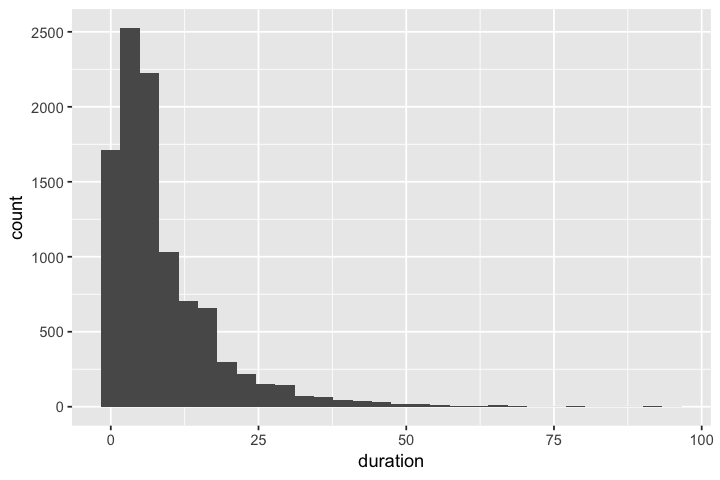

In [51]:
posts4 <- posts3 %>% arrange(time) %>% mutate(duration = time - lag(time))
ggplot(posts4) + geom_histogram(aes(x=duration))

### Problem 5
Note that the times are currently in the UTC timezone. Convert these to EST (`"America/New_York"`). Then group the data by hour and calculate the median post length for each hour. Plot this as a line graph:

![plot](stats306_lab8_prob5.png)

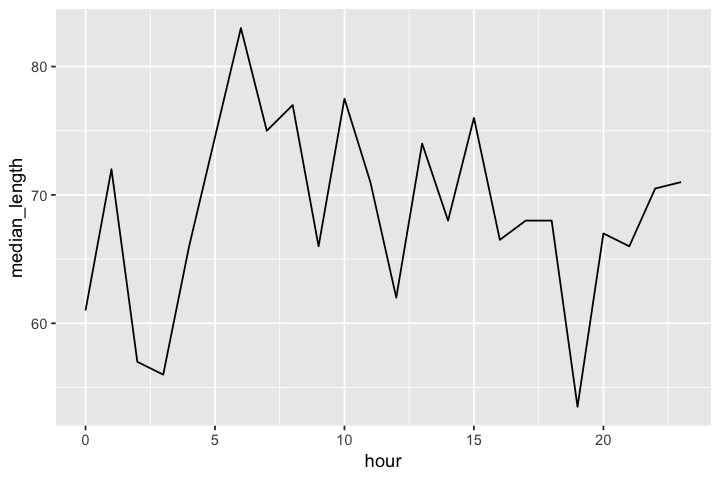

In [52]:
posts5 = posts4 %>% mutate(time = with_tz(time, "America/New_York")) %>%
    mutate(length=str_length(body), hour = hour(time)) %>%
    group_by(hour) %>% summarize(median_length=median(length))

ggplot(posts5, aes(x=hour, y=median_length)) + geom_line()

### Problem 6
Can you make the same plot as Problem 5, but instead grouping posts into 20-minute intervals? This should result in a plot similar to the following:

![plot](stats306_lab8_prob6.png)

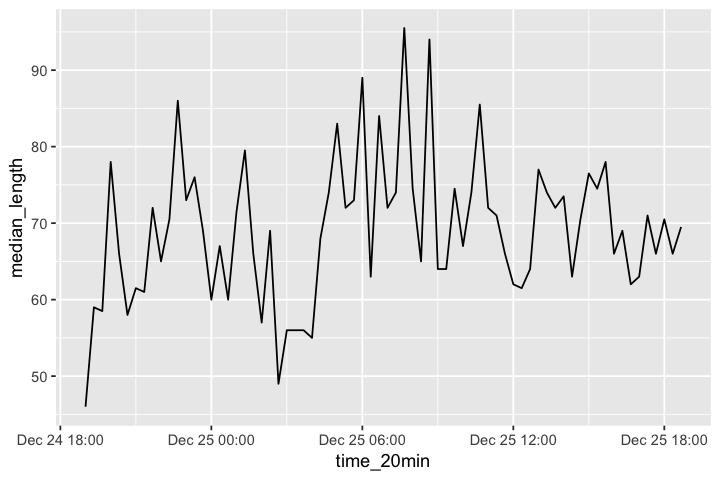

In [54]:
posts6 = posts4 %>% mutate(time = with_tz(time, "America/New_York")) %>%
    mutate(length=str_length(body), time_20min = floor_date(time, unit='20 minute')) %>%
    group_by(time_20min) %>% summarize(median_length=median(length))

ggplot(posts6, aes(x=time_20min, y=median_length)) + geom_line()

## A Regex Exercise


Try to match the valid `dates` below (first row) without matching the invalid dates (the rest).

Hint: Start by writing a pattern that matches all the entries. Then try to refine your pattern to omit the invalid dates.

In [53]:
dates = c('2012-05-13', '2014-12-31', '1991-06-14', '1991/06/14',
          '200a-05-13',  # invalid year
          '2014-15-20',  # invalid month
          '2014-00-20',  # invalid month
          '2016-04-35',  # invalid day
          '2014-12-00',  # invalid day
          '2013/03-25')  # non-matching separators

str_view(dates, '\\d{4}[-/](0[1-9]|1[0-2])')

HTML widgets cannot be represented in plain text (need html)